In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv("Walmart_Sales.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Profit
0,1.0,05-02-2010,1643690.90,0.0,42.31,NaN,211.096358,8.0,192261.83
1,1.0,12-02-2010,1641957.44,1.0,38.51,NaN,211.242170,8.0,191792.06
2,NaN,19-02-2010,1611968.17,0.0,39.93,NaN,211.289143,8.0,191050.39
3,1.0,26-02-2010,1409727.59,0.0,46.63,NaN,211.319643,8.0,182901.99
4,1.0,05-03-2010,1554806.68,0.0,46.50,NaN,211.350143,8.0,166187.94


In [3]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [4]:
df['date_year'] = df['Date'].dt.year
df.sample(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Profit,date_year
3726,27.0,2010-04-02,2053952.97,0.0,46.90,2.957,135.746499,8.0,181258.40900,2010
6383,45.0,2011-11-04,833429.22,0.0,43.92,3.551,187.970363,9.0,NaN,2011
435,4.0,2010-03-19,1897429.36,0.0,55.19,2.743,126.606645,9.0,67226.74247,2010
198,2.0,2011-02-25,1833511.08,0.0,60.80,3.065,213.190421,8.0,88648.95289,2011
2222,16.0,2011-07-29,582381.95,0.0,66.84,3.547,193.711525,6.0,89915.86699,2011


In [5]:
df['date_month'] = df['Date'].dt.month
df.sample(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Profit,date_year,date_month
5121,36.0,2012-04-27,308389.82,0.0,70.06,3.888,220.301448,7.0,115890.59610,2012,4
4371,31.0,2011-08-26,1417267.07,0.0,92.07,3.523,215.386897,8.0,65181.56893,2011,8
3436,25.0,2010-03-05,665750.06,0.0,29.45,2.777,204.494073,8.0,174996.45320,2010,3
1779,13.0,2011-04-22,2124316.34,0.0,47.55,3.655,128.955300,7.0,109278.38090,2011,4
2983,21.0,2012-06-15,727049.04,0.0,81.51,3.393,221.400990,7.0,90808.60147,2012,6


In [6]:
df['date_day'] = df['Date'].dt.day
df.sample(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Profit,date_year,date_month,date_day
5799,41.0,2011-08-12,1356689.88,0.0,67.65,3.542,194.110502,7.0,181485.65050,2011,8,12
857,6.0,2012-10-26,1431426.34,0.0,72.34,3.506,225.068625,5.0,144184.72630,2012,10,26
6377,45.0,2011-09-23,714106.42,0.0,63.75,3.711,187.029532,9.0,NaN,2011,9,23
1841,13.0,2012-06-29,2037663.71,0.0,82.00,3.681,130.756267,6.0,95065.53537,2012,6,29
5454,39.0,2010-06-25,1280414.80,0.0,83.24,2.653,210.097523,8.0,80539.16490,2010,6,25


In [7]:
df['date_dow'] = df['Date'].dt.dayofweek
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Profit,date_year,date_month,date_day,date_dow
0,1.0,2010-02-05,1643690.90,0.0,42.31,NaN,211.096358,8.0,192261.83,2010,2,5,4
1,1.0,2010-02-12,1641957.44,1.0,38.51,NaN,211.242170,8.0,191792.06,2010,2,12,4
2,NaN,2010-02-19,1611968.17,0.0,39.93,NaN,211.289143,8.0,191050.39,2010,2,19,4
3,1.0,2010-02-26,1409727.59,0.0,46.63,NaN,211.319643,8.0,182901.99,2010,2,26,4
4,1.0,2010-03-05,1554806.68,0.0,46.50,NaN,211.350143,8.0,166187.94,2010,3,5,4


In [8]:
df['date_is_weekend'] = np.where(df['date_dow'].isin([5,6]), 1,0)
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Profit,date_year,date_month,date_day,date_dow,date_is_weekend
0,1.0,2010-02-05,1643690.90,0.0,42.31,NaN,211.096358,8.0,192261.83,2010,2,5,4,0
1,1.0,2010-02-12,1641957.44,1.0,38.51,NaN,211.242170,8.0,191792.06,2010,2,12,4,0
2,NaN,2010-02-19,1611968.17,0.0,39.93,NaN,211.289143,8.0,191050.39,2010,2,19,4,0
3,1.0,2010-02-26,1409727.59,0.0,46.63,NaN,211.319643,8.0,182901.99,2010,2,26,4,0
4,1.0,2010-03-05,1554806.68,0.0,46.50,NaN,211.350143,8.0,166187.94,2010,3,5,4,0


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [10]:
df.isnull().mean()*100

Store              0.714841
Date               0.000000
Weekly_Sales       0.000000
Holiday_Flag       1.989122
Temperature        2.175602
Fuel_Price         0.932401
CPI                0.543901
Unemployment       3.387723
Profit             3.139083
date_year          0.000000
date_month         0.000000
date_day           0.000000
date_dow           0.000000
date_is_weekend    0.000000
dtype: float64

In [11]:
# We decide that we remove data which is missing by less than 1%.

In [12]:
l = [col for col in df.columns if df[col].isnull().mean()<0.01 and df[col].isnull().mean()>0]
l

['Store', 'Fuel_Price', 'CPI']

In [13]:
# We do not do Complete Case Analysis on Fuel Price because a set of values or missing
l = l[2]

In [14]:
l

'CPI'

In [15]:
df.dropna(subset = l, inplace=True)

In [16]:
import pandas as pd


# Define arbitrary values for imputation
arbitrary_values = {'Store':-1}  # Define arbitrary values for each column

# Impute missing values with arbitrary values
for column, value in arbitrary_values.items():
    df[column].fillna(value, inplace=True)

df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Profit,date_year,date_month,date_day,date_dow,date_is_weekend
0,1.0,2010-02-05,1643690.90,0.0,42.31,NaN,211.096358,8.0,192261.83,2010,2,5,4,0
1,1.0,2010-02-12,1641957.44,1.0,38.51,NaN,211.242170,8.0,191792.06,2010,2,12,4,0
2,-1.0,2010-02-19,1611968.17,0.0,39.93,NaN,211.289143,8.0,191050.39,2010,2,19,4,0
3,1.0,2010-02-26,1409727.59,0.0,46.63,NaN,211.319643,8.0,182901.99,2010,2,26,4,0
4,1.0,2010-03-05,1554806.68,0.0,46.50,NaN,211.350143,8.0,166187.94,2010,3,5,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6429,45.0,2012-09-21,723086.20,0.0,65.32,NaN,191.856704,9.0,NaN,2012,9,21,4,0
6431,45.0,2012-10-05,733455.07,0.0,64.89,NaN,192.170412,9.0,NaN,2012,10,5,4,0
6432,45.0,2012-10-12,734464.36,0.0,54.47,NaN,192.327265,9.0,NaN,2012,10,12,4,0
6433,45.0,2012-10-19,718125.53,0.0,56.47,NaN,192.330854,9.0,NaN,2012,10,19,4,0


In [17]:
def random_sampling_imputation(column):
        non_missing_values = df[column].dropna()
        random_samples = np.random.choice(non_missing_values, size=df[column].isnull().sum(), replace=True)
        df.loc[df[column].isnull(), column] = random_samples

In [18]:
random_sampling_imputation('Holiday_Flag')

In [19]:
df.isna().mean()*100

Store              0.000000
Date               0.000000
Weekly_Sales       0.000000
Holiday_Flag       0.000000
Temperature        2.109375
Fuel_Price         0.718750
CPI                0.000000
Unemployment       3.359375
Profit             3.000000
date_year          0.000000
date_month         0.000000
date_day           0.000000
date_dow           0.000000
date_is_weekend    0.000000
dtype: float64

Text(0.5, 1.0, 'Temperature')

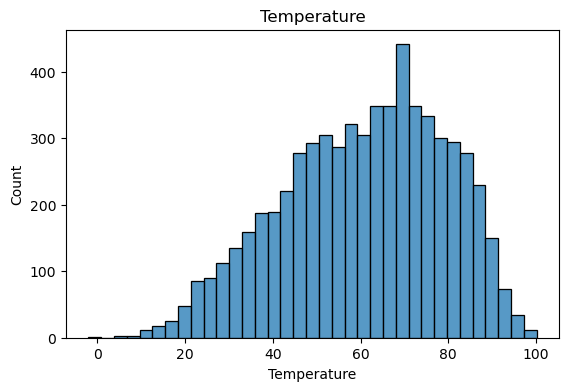

In [20]:
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.histplot(df['Temperature'])
plt.title('Temperature')

In [21]:
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

# Initialize SimpleImputer with median strategy
si = SimpleImputer(strategy='median')

# Impute missing values in 'Temperature' column
df['Temperature'] = si.fit_transform(df[['Temperature']])

# Display the DataFrame after imputation
print(df)


      Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0       1.0 2010-02-05    1643690.90           0.0        42.31         NaN   
1       1.0 2010-02-12    1641957.44           1.0        38.51         NaN   
2      -1.0 2010-02-19    1611968.17           0.0        39.93         NaN   
3       1.0 2010-02-26    1409727.59           0.0        46.63         NaN   
4       1.0 2010-03-05    1554806.68           0.0        46.50         NaN   
...     ...        ...           ...           ...          ...         ...   
6429   45.0 2012-09-21     723086.20           0.0        65.32         NaN   
6431   45.0 2012-10-05     733455.07           0.0        64.89         NaN   
6432   45.0 2012-10-12     734464.36           0.0        54.47         NaN   
6433   45.0 2012-10-19     718125.53           0.0        56.47         NaN   
6434   45.0 2012-10-26     760281.43           0.0        58.85         NaN   

             CPI  Unemployment     Profit  date_yea

In [22]:
df.isna().sum()

Store                0
Date                 0
Weekly_Sales         0
Holiday_Flag         0
Temperature          0
Fuel_Price          46
CPI                  0
Unemployment       215
Profit             192
date_year            0
date_month           0
date_day             0
date_dow             0
date_is_weekend      0
dtype: int64

In [23]:
df["Fuel_Price"].fillna(df["Fuel_Price"].max(), inplace=True)
print(df)

      Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0       1.0 2010-02-05    1643690.90           0.0        42.31       4.468   
1       1.0 2010-02-12    1641957.44           1.0        38.51       4.468   
2      -1.0 2010-02-19    1611968.17           0.0        39.93       4.468   
3       1.0 2010-02-26    1409727.59           0.0        46.63       4.468   
4       1.0 2010-03-05    1554806.68           0.0        46.50       4.468   
...     ...        ...           ...           ...          ...         ...   
6429   45.0 2012-09-21     723086.20           0.0        65.32       4.468   
6431   45.0 2012-10-05     733455.07           0.0        64.89       4.468   
6432   45.0 2012-10-12     734464.36           0.0        54.47       4.468   
6433   45.0 2012-10-19     718125.53           0.0        56.47       4.468   
6434   45.0 2012-10-26     760281.43           0.0        58.85       4.468   

             CPI  Unemployment     Profit  date_yea

In [24]:
df.isna().sum()

Store                0
Date                 0
Weekly_Sales         0
Holiday_Flag         0
Temperature          0
Fuel_Price           0
CPI                  0
Unemployment       215
Profit             192
date_year            0
date_month           0
date_day             0
date_dow             0
date_is_weekend      0
dtype: int64

In [25]:
def random_sampling_imputation(column):
        non_missing_values = df[column].dropna()
        random_samples = np.random.choice(non_missing_values, size=df[column].isnull().sum(), replace=True)
        df.loc[df[column].isnull(), column] = random_samples

In [26]:
random_sampling_imputation('Unemployment')

In [27]:
df["Profit"].fillna(df["Profit"].max(), inplace=True)
print(df)

      Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0       1.0 2010-02-05    1643690.90           0.0        42.31       4.468   
1       1.0 2010-02-12    1641957.44           1.0        38.51       4.468   
2      -1.0 2010-02-19    1611968.17           0.0        39.93       4.468   
3       1.0 2010-02-26    1409727.59           0.0        46.63       4.468   
4       1.0 2010-03-05    1554806.68           0.0        46.50       4.468   
...     ...        ...           ...           ...          ...         ...   
6429   45.0 2012-09-21     723086.20           0.0        65.32       4.468   
6431   45.0 2012-10-05     733455.07           0.0        64.89       4.468   
6432   45.0 2012-10-12     734464.36           0.0        54.47       4.468   
6433   45.0 2012-10-19     718125.53           0.0        56.47       4.468   
6434   45.0 2012-10-26     760281.43           0.0        58.85       4.468   

             CPI  Unemployment     Profit  date_yea

In [28]:
df.isna().sum()

Store              0
Date               0
Weekly_Sales       0
Holiday_Flag       0
Temperature        0
Fuel_Price         0
CPI                0
Unemployment       0
Profit             0
date_year          0
date_month         0
date_day           0
date_dow           0
date_is_weekend    0
dtype: int64

In [29]:
df = df.drop('Date', axis=1)

In [30]:
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Profit,date_year,date_month,date_day,date_dow,date_is_weekend
0,1.0,1643690.90,0.0,42.31,4.468,211.096358,8.0,192261.83,2010,2,5,4,0
1,1.0,1641957.44,1.0,38.51,4.468,211.242170,8.0,191792.06,2010,2,12,4,0
2,-1.0,1611968.17,0.0,39.93,4.468,211.289143,8.0,191050.39,2010,2,19,4,0
3,1.0,1409727.59,0.0,46.63,4.468,211.319643,8.0,182901.99,2010,2,26,4,0
4,1.0,1554806.68,0.0,46.50,4.468,211.350143,8.0,166187.94,2010,3,5,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6429,45.0,723086.20,0.0,65.32,4.468,191.856704,9.0,476485.43,2012,9,21,4,0
6431,45.0,733455.07,0.0,64.89,4.468,192.170412,9.0,476485.43,2012,10,5,4,0
6432,45.0,734464.36,0.0,54.47,4.468,192.327265,9.0,476485.43,2012,10,12,4,0
6433,45.0,718125.53,0.0,56.47,4.468,192.330854,9.0,476485.43,2012,10,19,4,0


In [31]:
# copy the data 
df_max_scaled = df.copy()

# apply normalization techniques 
for column in df_max_scaled.columns: 
	df_max_scaled[column] = df_max_scaled[column] / df_max_scaled[column].abs().max() 
	
# view normalized data 
display(df_max_scaled) 

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Profit,date_year,date_month,date_day,date_dow,date_is_weekend
0,0.022222,0.430434,0.0,0.422508,1.0,0.928987,0.571429,0.403500,0.999006,0.166667,0.161290,1.0,NaN
1,0.022222,0.429980,1.0,0.384562,1.0,0.929629,0.571429,0.402514,0.999006,0.166667,0.387097,1.0,NaN
2,-0.022222,0.422126,0.0,0.398742,1.0,0.929836,0.571429,0.400957,0.999006,0.166667,0.612903,1.0,NaN
3,0.022222,0.369166,0.0,0.465648,1.0,0.929970,0.571429,0.383856,0.999006,0.166667,0.838710,1.0,NaN
4,0.022222,0.407157,0.0,0.464350,1.0,0.930104,0.571429,0.348779,0.999006,0.250000,0.161290,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6429,1.000000,0.189355,0.0,0.652287,1.0,0.844318,0.642857,1.000000,1.000000,0.750000,0.677419,1.0,NaN
6431,1.000000,0.192070,0.0,0.647993,1.0,0.845698,0.642857,1.000000,1.000000,0.833333,0.161290,1.0,NaN
6432,1.000000,0.192334,0.0,0.543938,1.0,0.846389,0.642857,1.000000,1.000000,0.833333,0.387097,1.0,NaN
6433,1.000000,0.188056,0.0,0.563911,1.0,0.846404,0.642857,1.000000,1.000000,0.833333,0.612903,1.0,NaN


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Weekly_Sales'],axis=1),df['Weekly_Sales'],test_size=0.3,random_state=1)
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [33]:
y_pred = model.predict(X_test)

print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('R2 Score',r2_score(y_test,y_pred))

MAE 430584.79161285196
MSE 270506867224.75143
R2 Score 0.15908707669346456


In [36]:
residual = y_test - y_pred

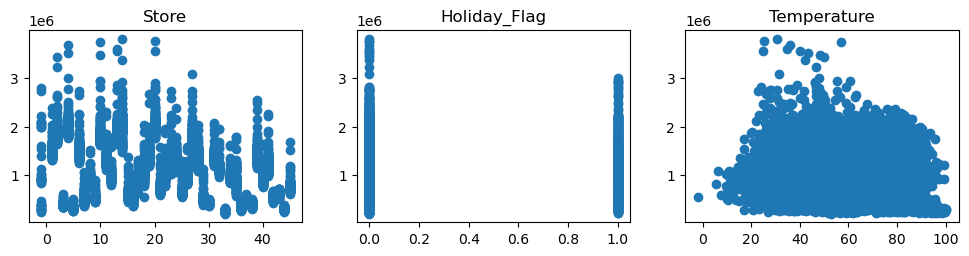

In [37]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12,2.5))

ax1.scatter(df['Store'],df['Weekly_Sales'])
ax1.set_title("Store")
ax2.scatter(df['Holiday_Flag'],df['Weekly_Sales'])
ax2.set_title("Holiday_Flag")
ax3.scatter(df['Temperature'],df['Weekly_Sales'])
ax3.set_title("Temperature")

plt.show()

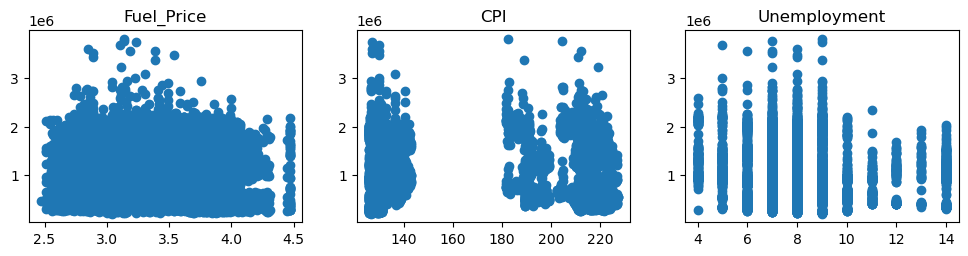

In [38]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12,2.5))

ax1.scatter(df['Fuel_Price'],df['Weekly_Sales'])
ax1.set_title("Fuel_Price")
ax2.scatter(df['CPI'],df['Weekly_Sales'])
ax2.set_title("CPI")
ax3.scatter(df['Unemployment'],df['Weekly_Sales'])
ax3.set_title("Unemployment")

plt.show()

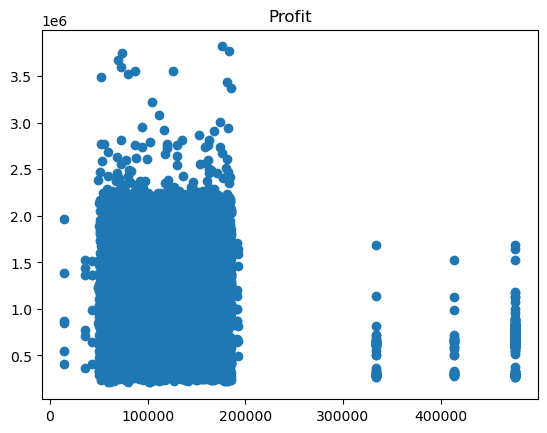

In [42]:
plt.scatter(df['Profit'],df['Weekly_Sales'])
plt.title("Profit")
plt.show()

<AxesSubplot:>

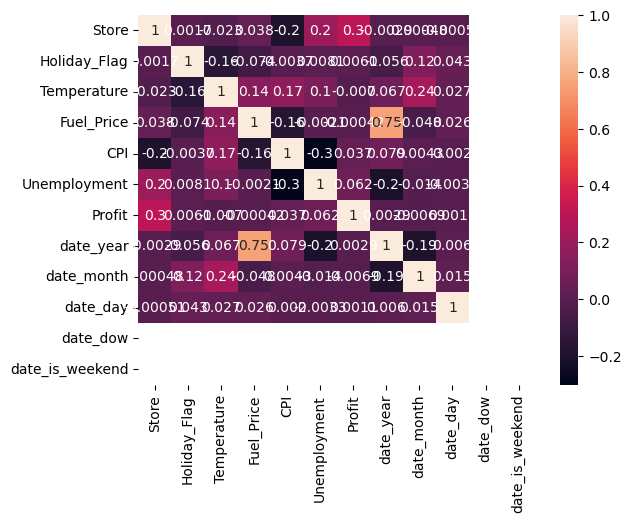

In [43]:
import seaborn as sns
sns.heatmap(df.drop(columns=['Weekly_Sales'],axis=1).corr(),annot=True)

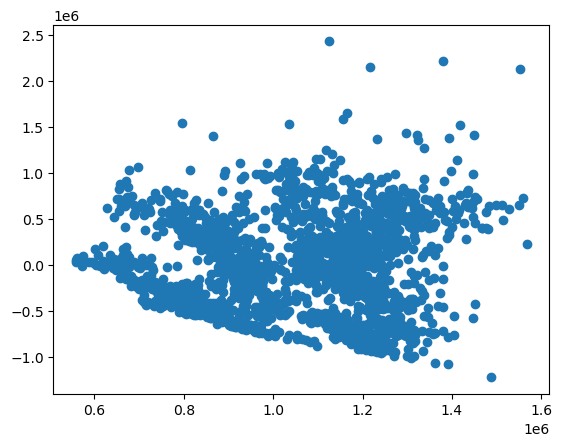

In [44]:
plt.scatter(y_pred,residual)

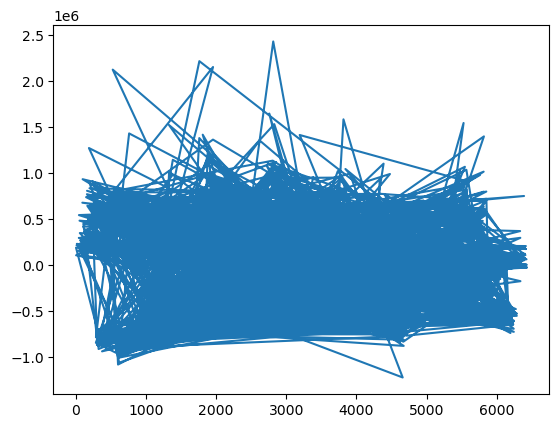

In [45]:
plt.plot(residual) 